In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = 'advertising.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


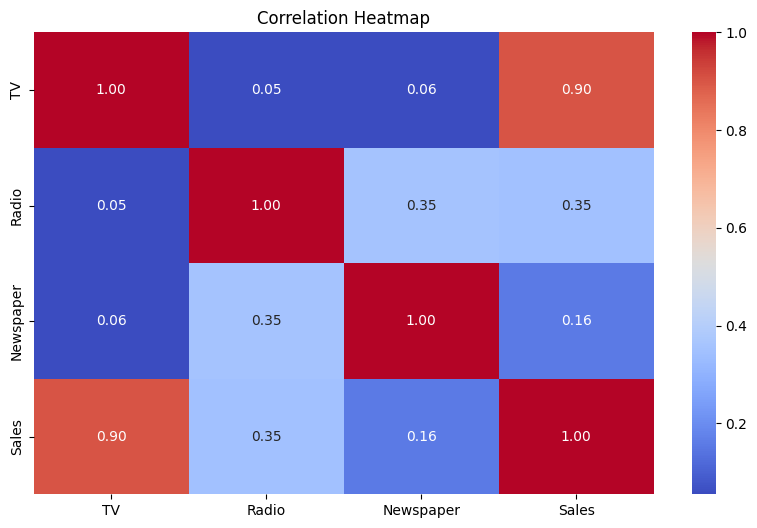

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1200x500 with 0 Axes>

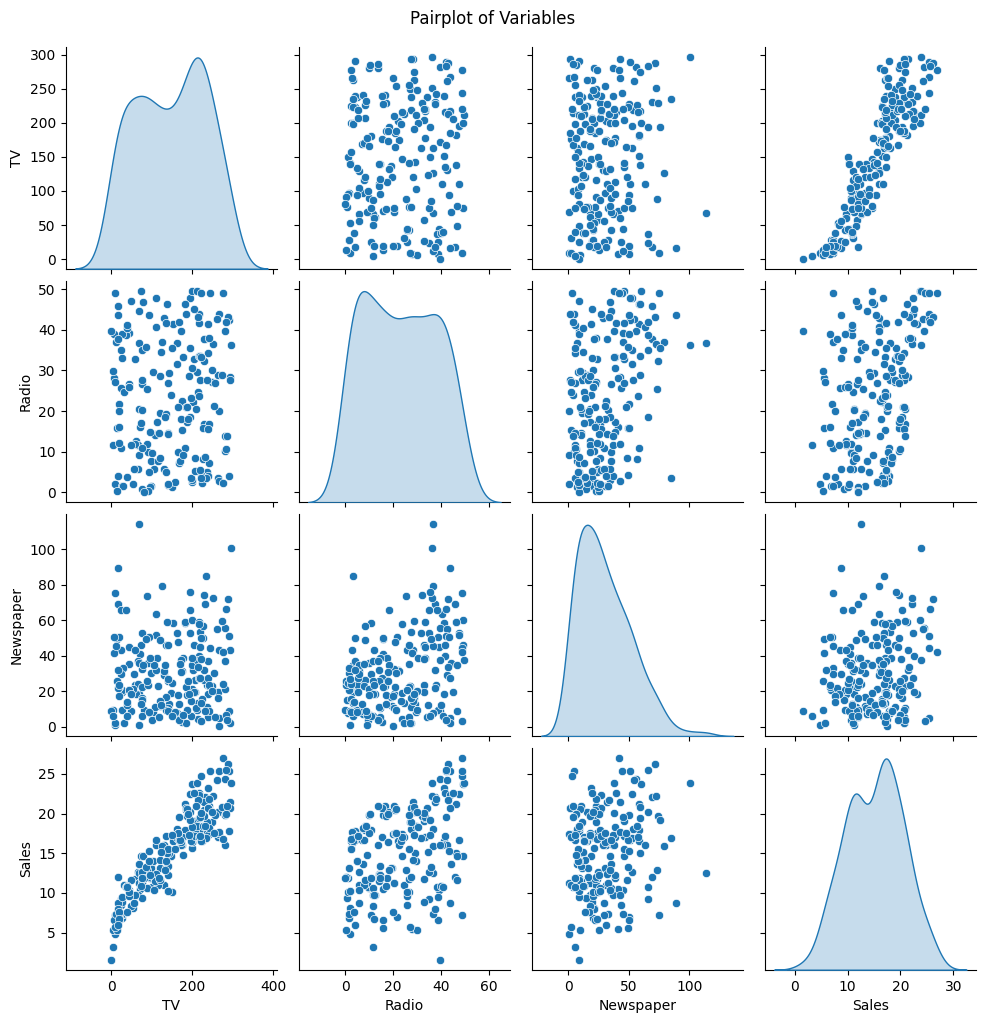

In [6]:
plt.figure(figsize=(12, 5))
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

In [7]:
# Define features and target
X = data.drop('Sales', axis=1)  # Features (TV, Radio, Newspaper)
y = data['Sales']  # Target

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 2.91
R-squared (R²): 0.91


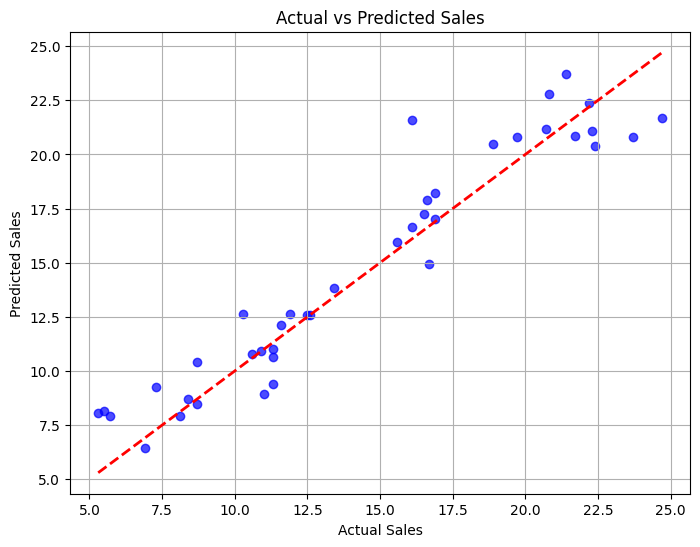

In [13]:
# Visualize actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid()
plt.show()

In [14]:
# Feature Importance (Coefficient Analysis)
coefficients = model.coef_
features = X.columns

<ipython-input-15-4eba20cd9f66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette='viridis')


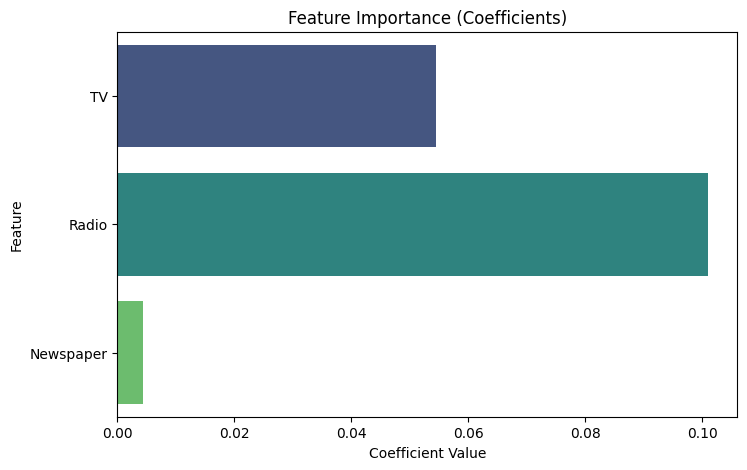

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=features, palette='viridis')
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [16]:
# Predict on a custom input
custom_input = pd.DataFrame({
    'TV': [150, 200],
    'Radio': [30, 50],
    'Newspaper': [20, 15]
})
custom_predictions = model.predict(custom_input)

In [17]:
print("\nCustom Predictions:")
print(custom_input)
print("Predicted Sales:", custom_predictions)


Custom Predictions:
    TV  Radio  Newspaper
0  150     30         20
1  200     50         15
Predicted Sales: [16.00561084 20.72829839]
